## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The data are composed of three time series; temperature, humidity, and luminosity.


In [0]:
import pandas as pd

In [38]:
# loading json file from MongoDB via web (CORS, port=3030)
url="http://chaos.inje.ac.kr:3030/iot"
df=pd.read_json(url) # json파일을 pandas에서 읽어서 사용
print('Large data was retrieved successfully from MongoDB!')

Large data was retrieved successfully from MongoDB!


In [39]:
df.head()

,_id,date,temperature,humidity,luminosity,__v
0,5dd79bb4bdff8d2a0867b319,2019-11-22 17:26:28.484,21.1,37.1,43,0
1,5dd79bbebdff8d2a0867b31a,2019-11-22 17:26:38.729,21.1,37.2,43,0
2,5dd79bc8bdff8d2a0867b31b,2019-11-22 17:26:48.975,21.0,37.4,43,0
3,5dd79bd3bdff8d2a0867b31c,2019-11-22 17:26:59.237,21.0,37.7,43,0
4,5dd79bddbdff8d2a0867b31d,2019-11-22 17:27:09.483,20.9,37.9,43,0


In [40]:
df.tail()

,_id,date,temperature,humidity,luminosity,__v
57161,5de08e4feaedb40518db9ae7,2019-11-29 12:19:43.226,23.1,15.3,387,0
57162,5de08e59eaedb40518db9ae8,2019-11-29 12:19:53.487,23.1,15.1,383,0
57163,5de08e63eaedb40518db9ae9,2019-11-29 12:20:03.733,23.2,15.5,383,0
57164,5de08e6deaedb40518db9aea,2019-11-29 12:20:13.995,23.2,16.1,383,0
57165,5de08e78eaedb40518db9aeb,2019-11-29 12:20:24.240,23.3,16.2,379,0


In [41]:
df.shape, type(df)

((57166, 6), pandas.core.frame.DataFrame)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57166 entries, 0 to 57165
Data columns (total 6 columns):
_id            57166 non-null object
date           57166 non-null datetime64[ns]
temperature    57166 non-null float64
humidity       57166 non-null float64
luminosity     57166 non-null int64
__v            57166 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.6+ MB


In [43]:
df.describe()

,temperature,humidity,luminosity,__v
count,57166.000000,57166.000000,57166.000000,57166.0
mean,19.976281,36.509890,53.432320,0.0
std,1.003887,5.433448,109.478571,0.0
min,16.200000,13.700000,0.000000,0.0
25%,19.400000,33.300000,0.000000,0.0
50%,19.700000,35.500000,0.000000,0.0
75%,20.300000,39.400000,55.000000,0.0
max,24.000000,52.900000,512.000000,0.0


### Dataframe with date and three sensor values(temperature, humidity, luminosity)

In [44]:
df.columns

Index(['_id', 'date', 'temperature', 'humidity', 'luminosity', '__v'], dtype='object')

In [0]:
iot_data = df[['date', 'temperature', 'humidity', 'luminosity']]

In [46]:
iot_data.shape

(57166, 4)

In [47]:
iot_data.head()  # date와 3 개의 신호를 확인.

,date,temperature,humidity,luminosity
0,2019-11-22 17:26:28.484,21.1,37.1,43
1,2019-11-22 17:26:38.729,21.1,37.2,43
2,2019-11-22 17:26:48.975,21.0,37.4,43
3,2019-11-22 17:26:59.237,21.0,37.7,43
4,2019-11-22 17:27:09.483,20.9,37.9,43


In [48]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57166 entries, 0 to 57165
Data columns (total 4 columns):
date           57166 non-null datetime64[ns]
temperature    57166 non-null float64
humidity       57166 non-null float64
luminosity     57166 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.7 MB


In [0]:
# Save iot data in csv file.
iot_data.to_csv('iot_data_191129.csv')

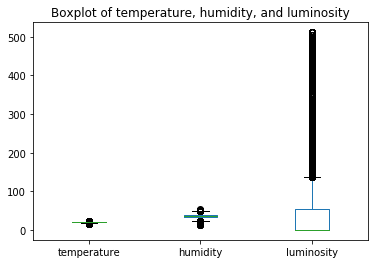

In [50]:
# Plot boxplot
iot_data[['temperature','humidity','luminosity']].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.loc[:,'temperature':'luminosity'].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.iloc[:,1:].plot.box(title='Boxplot of temperature, humidity, and luminosity')

### Plot time series of sensor data

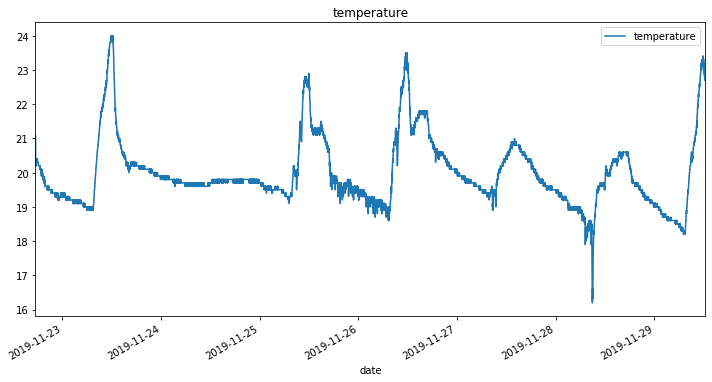

In [51]:
iot_data.plot(x='date', y='temperature', figsize=(12,6), title='temperature')

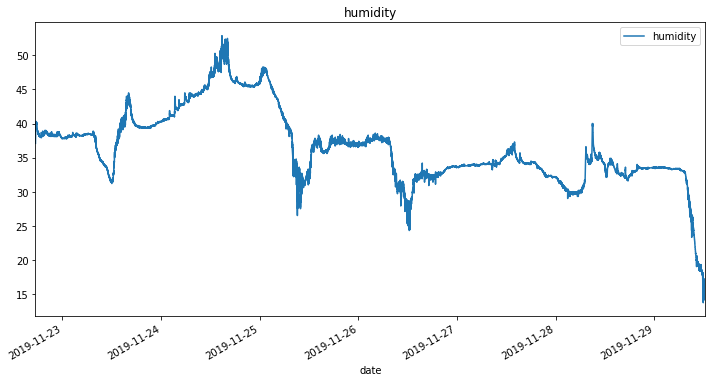

In [52]:
iot_data.plot(x='date', y='humidity', figsize=(12,6), title='humidity')

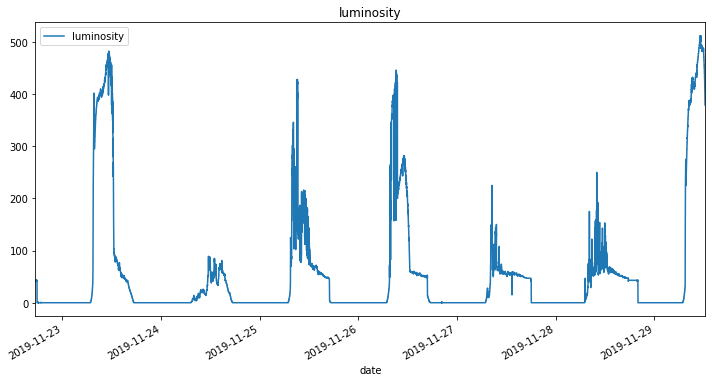

In [53]:
iot_data.plot(x='date', y='luminosity', figsize=(12,6), title='luminosity')

#### 다중그래프 (multiple fgraphs)

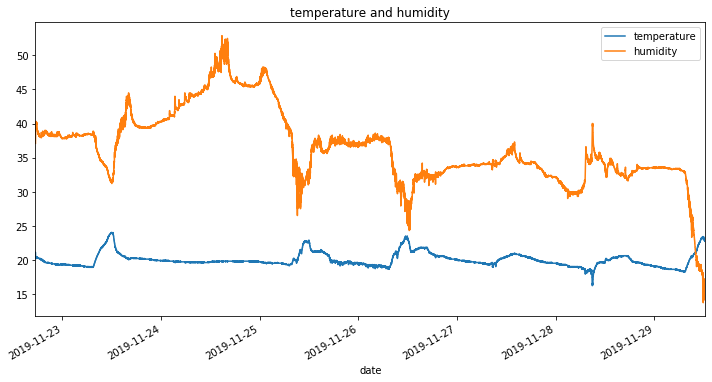

In [54]:
# Plot of ['temperature','humidity']
iot_data.plot(x='date', y=['temperature','humidity'], figsize=(12,6), title='temperature and humidity')

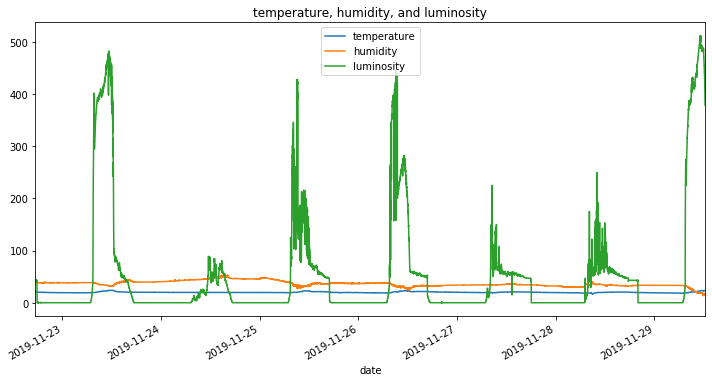

In [55]:
# Plot of ['temperature','humidity','luminosity']
iot_data.plot(x='date', y=['temperature','humidity','luminosity'], figsize=(12,6), 
             title='temperature, humidity, and luminosity')

#### Plot the mean of sensor data

In [56]:
iot_data[['temperature','humidity','luminosity']].mean()  

temperature    19.976281
humidity       36.509890
luminosity     53.432320
dtype: float64

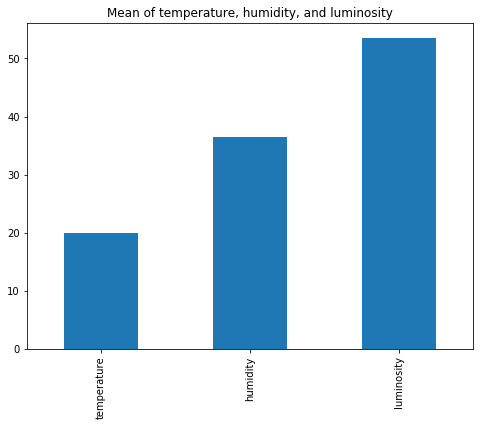

In [57]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,6), 
                                                                  title="Mean of temperature, humidity, and luminosity")

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, 1 week

#### Set date as index of timestamp

In [0]:
iot_data.set_index('date',inplace=True) # date를 인덱스로 

In [59]:
iot_data.info() # timestamp index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57166 entries, 2019-11-22 17:26:28.484000 to 2019-11-29 12:20:24.240000
Data columns (total 3 columns):
temperature    57166 non-null float64
humidity       57166 non-null float64
luminosity     57166 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.7 MB


In [60]:
iot_data.head()

,temperature,humidity,luminosity
date,,,
2019-11-22 17:26:28.484,21.1,37.1,43
2019-11-22 17:26:38.729,21.1,37.2,43
2019-11-22 17:26:48.975,21.0,37.4,43
2019-11-22 17:26:59.237,21.0,37.7,43
2019-11-22 17:27:09.483,20.9,37.9,43


In [61]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean() # resample함수로 60초 간격으로 끊어서 평균값을 구해준다

,temperature,humidity,luminosity
date,,,
2019-11-22 17:26:00,21.050000,37.350000,43.000000
2019-11-22 17:27:00,20.780000,38.220000,42.800000
2019-11-22 17:28:00,20.566667,39.050000,43.000000
2019-11-22 17:29:00,20.433333,39.483333,43.000000
2019-11-22 17:30:00,20.300000,39.816667,42.666667
...,...,...,...
2019-11-29 12:16:00,22.900000,15.533333,409.500000
2019-11-29 12:17:00,22.920000,15.580000,404.400000
2019-11-29 12:18:00,22.900000,14.883333,396.666667


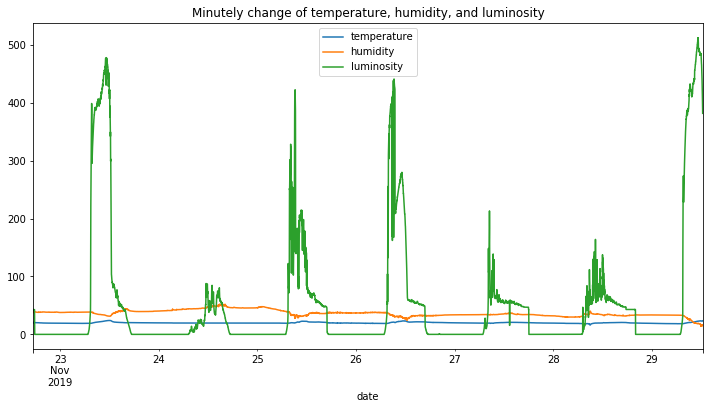

In [62]:
#  Plot mean of the iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(12,6), 
                                     title='Minutely change of temperature, humidity, and luminosity')

In [63]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity
date,,,
2019-11-22 17:00:00,20.356790,39.430247,25.185185
2019-11-22 18:00:00,20.146875,38.235795,0.008523
2019-11-22 19:00:00,19.776638,38.509972,0.000000
2019-11-22 20:00:00,19.558405,38.452422,0.000000
2019-11-22 21:00:00,19.437037,38.278632,0.000000
...,...,...,...
2019-11-29 08:00:00,19.886040,28.439316,372.370370
2019-11-29 09:00:00,20.711681,24.359259,420.606838
2019-11-29 10:00:00,21.798006,19.676923,460.854701


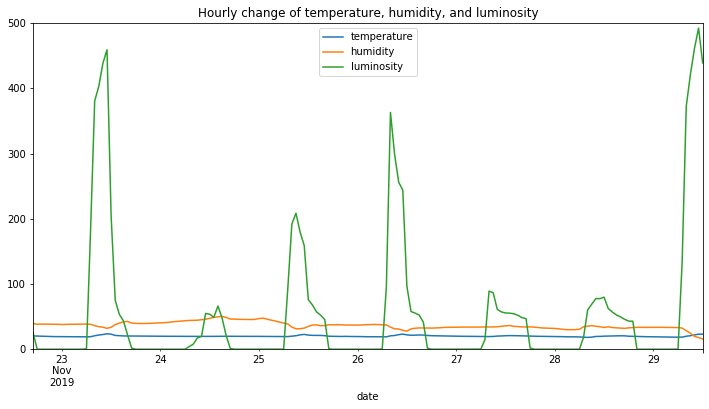

In [64]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(12,6), 
                                   title='Hourly change of temperature, humidity, and luminosity', 
                                   ylim=[0,500])

In [65]:
# Estimate the mean of iot data for every day
iot_data.resample('D').mean()

,temperature,humidity,luminosity
date,,,
2019-11-22,19.647818,38.399956,1.799471
2019-11-23,20.309932,38.152403,94.351964
2019-11-24,19.736533,45.101768,14.262103
2019-11-25,20.184906,38.322131,47.118310
2019-11-26,20.487860,33.823852,65.097544
2019-11-27,19.954373,34.055239,25.957043
2019-11-28,19.436402,32.784967,30.635619
2019-11-29,19.657743,29.332449,164.445880


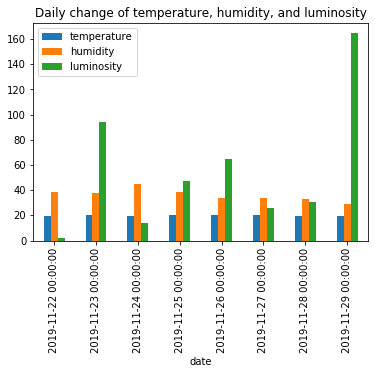

In [66]:
#  Plot mean of the iot data per every day
iot_data.resample('D').mean().plot(kind='bar', #marker='o', ms=6, figsize=(12,6), 
                                   title='Daily change of temperature, humidity, and luminosity')

In [67]:
# Estimate the mean of iot data for every week
iot_data.resample('W').mean()

,temperature,humidity,luminosity
date,,,
2019-11-24,19.978676,41.244379,48.075089
2019-12-01,19.975078,34.129828,56.125440


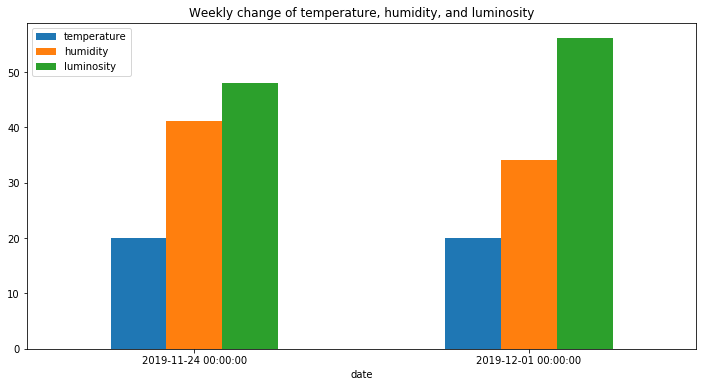

In [68]:
#  Plot mean of the iot data per every week
iot_data.resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature, humidity, and luminosity',rot=0)

## 와, Great!